
  <font size= 15>
 <font color='red'>
Analysis of marine bacteria data
 </font> 
  </font> 

### José Ángel Tinoco Carrillo 

#### Now it´s time to explore oceanography and all the insights the world´s largest biome can bring!

<img src="https://oceantoday.noaa.gov/nampan_science/otkx_525b_nampan_science_web_1280.jpg" width="600">

<br>

#### All that from behind our computers screens of course...


<img src="https://i.kym-cdn.com/entries/icons/original/000/023/419/nerd_smoking.JPG" width="600">


### *The dataset : Bacterial data*

The dataset featured in this homework comes from a collection of seawater samples taken Pivers Island Coastal Observatory between January 2011 and December 2013. Several indicators were measured from each sample:

### Biochemicals:
Bacteria abundance: Our main indicator, measured in cells/mL.
<br>
Chlorophyll: concentration of chlorophyll a in µg/L. This variable indicates the presence of photosynthetic organisms.

### Nutrients:
These are compounds that are present in small quantities in the ocean, and are essential for the survival of life in the ocean. Nevertheless, they are present in very small quantities, so they are usually measured in parts per million (ppm).
The ammonia, nitrates and nitrites variables are all necessary nutrients for all life forms, as nitrogen bases are essential for the building of DNA nucleotides. These 3 compounds form the nitrogen cycle in the ocean:
<br>
NH4: Cyanobacteria are the main fixers of nitrogen in the ocean, they convert nitrogen gas to ammonia. This compound tends to be very scarce in the ocean, because phytoplankton absorb it from surface waters, and in deeper waters it is used by nitrite bacteria as an energy source.
<br>
NO2 and NO3: These compounds are the second half of the nitrogen cycle in the ocean. Nitrites can come from weathering of land soils and rocks, or they can be produced by nitrite bacteria using ammonia. Afterwards, nitrate bacteria convert nitrite into nitrates.
<br>
PO4: Another of the essential major nutrients for the existence of life.
<br>
SiO4: Silicates are used by a variety of organisms, according to Sarmiento & Gruber (2006): " There are several organisms that take up silicic acid to form various types of structures, including sponges, radiolaria, silicoflagellates, and diatoms." (Page 270 )   Namely, diatoms utilize it to form their cell walls, so lower levels of this compound might indicate a higher prevalence of these kind of marine microorganisms.

### Physicochemical properties
pH: the measure of how acidic/alkaline the sample is, measured from 1 - 14; pH < 7 is acid, pH > 7 is alkaline.
<br>
Temperature: surface water temperature in °C.
<br>
Salinity: it refers to the total dissolved solids in water, and is measured in parts per thousand (‰). According to Leckie and Yuretich, "Average ocean salinity is 35 ‰. In most parts of the ocean , the salinity ranges between 33 ‰ and and 37 ‰." (2000, page 115)
<br>
Oxygen saturation: ratio of how much oxygen is dissolved in water to how much can be dissolved at a given temperature, it is expressed as a percentage. It is important because it can tell about the general activity of photosynthetic organisms, as these produce oxygen, leading to an increase in the oxygen saturation of water.
<br>
DIC: dissolved inorganic carbons; they are all the carbon compounds that are not part of biochemical complexes, and are related to pH, according to St-Jean (2003): "Dissolved Inorganic Carbon (0.45-µm filtered sample). DIC = CO2(aq) + H2CO3 + HCO3 + CO3; where the relative concentration of each component is a function of pH." (Paragraph 8) This variable is measured in µM.





With all this established it´s time to load the dataset:

In [27]:
#Invite our trusty friends to the party
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import RANSACRegressor
from sklearn.manifold import TSNE
sns.set_style('whitegrid')

In [28]:
#Import the dataset, turn the YearDay column into a seasons column, and drop the unneeded/redundant variables.
df = pd.read_csv("PIDweekly_env_data.txt", delim_whitespace=True)
Mar = 31+28+1
Jun = Mar+31+30+31 # no +1 because Mar already has the +1
Sep = Jun+30+31+31
Nov = Sep+30+31+30
seasons = []
for i in range(df["YearDay"].size):
    day = df["YearDay"][i]
    if ( day % 365 >= Mar ) & ( day % 365 <  Jun ):
        seasons.append("spring")
    elif ( day % 365 >= Jun ) & ( day % 365 <  Sep ):
        seasons.append("summer")
    elif ( day % 365 >= Sep ) & ( day % 365 <  Nov ):
        seasons.append("autumn")
    else:
        seasons.append("winter")        
df["seasons"] = seasons
df_numericals = df.drop(labels=["YearDay", "SampleID", "MLLW",'Projected_Daily_Insolation'], axis=1)
df_numericals

/tmp/ipykernel_7756/815235410.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("PIDweekly_env_data.txt", delim_whitespace=True)


,Bacteria_abundance,Temp,Salinity,Oxygen_Saturation,pH,DIC,Chlorophyll,NH4,NO2.NO3,PO4,SiO4,seasons
0,1362561.576,8.20,32.00,99.40,7.93,1984.69,3.03,97.61,0.04,0.07,2.09,winter
1,2083018.868,7.40,32.00,99.80,7.92,1971.00,3.61,390.63,0.02,0.05,1.79,winter
2,2335241.000,9.40,32.00,102.60,7.91,1989.22,3.25,156.50,0.00,0.04,1.34,winter
3,2559090.909,9.30,31.00,98.30,7.90,1935.01,3.90,226.96,0.00,0.05,2.63,winter
4,2958974.359,8.90,32.00,104.90,7.92,1967.62,4.10,167.46,0.00,0.04,1.92,winter
...,...,...,...,...,...,...,...,...,...,...,...,...
146,2194444.444,14.75,32.71,92.60,7.93,2079.10,4.00,145.50,0.20,0.04,1.92,autumn
147,1931092.437,13.15,33.43,89.50,7.94,2084.57,4.85,67.50,0.06,0.04,1.94,winter
148,2469902.913,12.50,32.22,90.25,7.89,2066.73,3.55,111.00,0.16,0.06,4.23,winter
149,2082000.000,12.10,32.39,91.65,7.92,2047.47,4.95,76.50,0.00,0.05,3.99,winter


#### What can we know from the data??
Now that we know our variables and loaded the data set, it´s high time we start asking the important questions, which will guide the analysis afterwards:
* What factors contribute to bacterial abundance?
One of the first points of interest that comes to mind is to find out what factors benefit bacterial abundance, or, in other words, *how can we reduce the noise in the data and identify the key variables that generate bigger bacterial numbers?*
* Which variables or groups of variables show seasonal cycles?
<br> According to Leckie & Yuretich: "The availability of solar energy varies across latitude and it varies by season, particularly in the mid to high latitudes because of the differences in the angle of solar incidence.The magnitude of surface water heating and the depth of the photic zone depend on the angle of solar incidence". (2000, page 152) <br>
Therefore, we can infer that there could be a seasonal cycle in temperature due to changes in the availability of solar energy. Likewise, this variability in solar radiation might generate some kind of pattern in chlorophyll a concentrations, as sunlight could stimulate the growth of chlorophyll producing photosynthetic bacteria.
Moreover, literature also suggests that phosphate concentrations are different between seasons, showing the lowest concentrations during summer, where bacteria consume it most. However, taht pattern might not be very visible, according to Conkright  *et. al.* : " Enrichment of phosphate from the Amazon and Orinoco rivers appears to dominate the seasonal signal in the tropical Atlantic. In fact, the extent of the rivers’ effects extend so far north into the North Atlantic gyre that it obscures the normal pattern of summer depletion occurring elsewhere in the basin. " (2000, paragraph 1)
<br>These phenomena are very relevant to our study as PICO site is located in North Carolina, U.S.A., so our data might have been able to pick up on these patterns due to the location where the samples were taken.
* Does the microbiological makeup of the ocean change between seasons?
<br> Bacterial concentration was already mentioned above as a possible factor that could differ among seasons, but a similar relevant question would be, can the data tell us about what *types* of bacteria are more common in each season? This could be done by analyzing the variables given, for example, what nutrients are most depleted during a particular season? Does more sunlight = more photosynthetic bacteria?
<br> These questions, among others, will help to get insights and analyze patterns from our data!

# Data Analysis time!

<img src="https://miro.medium.com/v2/resize:fit:505/0*B-rgeu75PoP4MYmj.jpg" width="400">
<img src="https://www.siliconrepublic.com/wp-content/uploads/2014/12/img/data-analyst1.jpg" width="640">



### Are there really seasonal differences??

Now its time to start pointing our guns at the dataset. I started by generating subsets of the data for each season:


In [29]:
#AI helped me with the globals part, didn´t know how to make python auto-declare variables before.
seasons_list = ['winter', 'summer', 'spring', 'autumn']
for season in seasons_list:
    globals()[season + '_data'] = df_numericals.loc[df_numericals['seasons'] == season]

A basic question before analyzing seasonal patterns is whether there are any seasonal patterns. Anyways, my idea was to delve into different variables to see if there are seasonal variations and use the power of statistics to determine whether there are statistically significant differences. The first thing I did was plot the distributions of various variables per season:

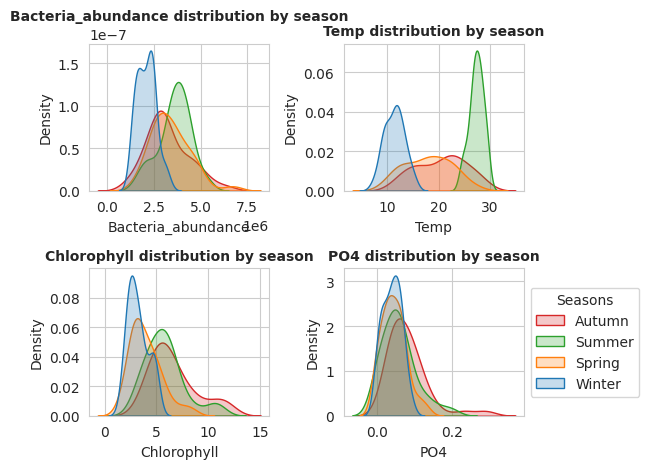

In [30]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
features=['Bacteria_abundance','Temp','Chlorophyll','PO4']
axes=[ax1,ax2,ax3,ax4]
for feature, ax in zip(features, axes):
    lines = sns.kdeplot(data=df_numericals, x=feature, hue="seasons", fill=True, ax=ax,legend= False)
    ax.set_title(
        str(feature) + ' distribution by season',
        weight='bold',
        size=10
    )
ax.legend(("Autumn", "Summer", "Spring", "Winter"), loc='center left', bbox_to_anchor=(1, 0.5), title='Seasons')
plt.tight_layout()

In this section, I'm analyzing the bacteria abundance, temperature, chlorophyll, and PO4 variables because their seasonal distributions showed the sharpest differences, seasonal cycles were reported in the literature (PO4 and temperature), or because these variables were low hanging fruit when it comes to seasonal variations.<br>
<br>
For bacteria abundance, it looks like winter features lower bacterial concentrations, summer has higher concentrations than the others, and spring and autumn exhibit similar patterns. The temperature variable shows similar seasonal patterns.<br>
<br>
Chlorophyll also features distinctly lower values, closely followed by spring, while summer and autumn show similar distributions.<br>
<br>
Lastly, the PO4 plot features a lot of overlap, consistent with the literature which mentions seasonal cycles softened by phosphates from continental rivers.<br>
<br>
For this analysis, I'm using the Z-test, the ANOVA test, and the Tukey test. The Z-test is for comparing means of two groups, the ANOVA test is for comparing means of more than 2 groups, and the Tukey test is used to delve deeper into the results of the ANOVA test by conducting one-to-one comparisons between groups.<br>
With this framework established, I started asking the big questions to our statistical friends:

In [31]:
#Define the ANOVA test as a function, Ai helped turn the whole thing to a function.
def evaluate_f_test(data_dict, var):
    alpha = 0.05
    f_val, p_val = stats.f_oneway(*data_dict.values())
    print("F-test evaluation")
    print("=================")
    print(f"Null hypothesis that all means are the same, threshold value of {alpha:.2f}")
    print(f"One-sided f-value from the dataset is {f_val:.7f}, p-value is {p_val:.7f}")
    if p_val < alpha:
        print("")
        print("p-value smaller than threshold, REJECT null hypothesis")
        print(f"At least one pair with different mean, likely at the alpha = {alpha} significance")
    else:
        print("p-value not smaller than threshold, FAIL TO REJECT the null hypothesis")
        print("Cannot conclude means are different")
        print(" ")

In [32]:
#Define the Tukey test as a function, AI helped find the module and how to print the results from the test.
def perform_tukey_test(data, labels, var):
    result = pairwise_tukeyhsd(data, labels)
    result_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])
    print(result_df)

### Bacteria abundance

In [33]:
var = 'Bacteria_abundance'
data_dict = {'Winter': winter_data[var], 'Summer': summer_data[var], 'Spring': spring_data[var], 'Autumn': autumn_data[var]}
evaluate_f_test(data_dict, var)

F-test evaluation
Null hypothesis that all means are the same, threshold value of 0.05
One-sided f-value from the dataset is 19.9326574, p-value is 0.0000000

p-value smaller than threshold, REJECT null hypothesis
At least one pair with different mean, likely at the alpha = 0.05 significance


In [34]:
labels = np.concatenate([['winter'] * len(winter_data), ['summer'] * len(summer_data),['spring'] * len(spring_data), ['autumn'] * len(autumn_data)])
data = np.concatenate([winter_data[var], summer_data[var], spring_data[var], autumn_data[var]])
perform_tukey_test(data, labels, var)

   group1  group2      meandiff   p-adj         lower        upper  reject
0  autumn  spring  1.477557e+05  0.8995 -4.060035e+05  701514.8509   False
1  autumn  summer  3.673094e+05  0.2981 -1.758264e+05  910445.2831   False
2  autumn  winter -1.151067e+06  0.0000 -1.708709e+06 -593424.1539    True
3  spring  summer  2.195538e+05  0.7243 -3.273331e+05  766440.5747   False
4  spring  winter -1.298822e+06  0.0000 -1.860119e+06 -737525.7968    True
5  summer  winter -1.518376e+06  0.0000 -2.069194e+06 -967557.4891    True


These statistical tests show that there are two distinct profiles in bacterial abundance: a winter profile with significantly lower values, and an autumn-spring-summer profile. In all comparisons that didn't include winter, we didn't reject the null hypothesis that the two groups being compared are the same. It can be observed that the only group that has a significant difference when compared with the others is winter.

### Temperature
For the temperature variable it is pretty clear cut that the winter and summer distributions are significantly different than those of autumn and spring. However, these last two are visually very similar , but only statistics can help us truly discern significant differences. Therefore, I chose to compare spring and autumn mean values using a Z test.
<br>
This is doable because we have a sample size larger than 30. (Newcastle university)
<br>Specifically, we have a sample size of 37:

In [35]:
spring_data['Temp'].count()

np.int64(37)

So we can carry on with the Z- test:

In [36]:
spring_mean=spring_data['Temp'].mean()
spring_std=spring_data['Temp'].std()
spring_N=spring_data['Temp'].count()
autumn_mean=autumn_data['Temp'].mean()

confidence = 0.05
Z = (autumn_mean - spring_mean)/(spring_std/(np.sqrt(spring_N)))
CI_vals = stats.norm.interval(confidence=1-confidence)
print("Z-test evaluation")
print("=================")
print(f"edges of the {(1-confidence)*100}% CI edges = +-{CI_vals[1]:.4f}")
print(f"computed Z-statistic = {Z:.4f}")
print()
if abs(Z) > CI_vals[1]:
    print(f"Z-statistic outside of quartile range, REJECT null hypothesis")
    print(f"   spring mean {spring_mean:.4f} is significantly different to autumn mean {autumn_mean:.4f}")
else:
    print(f"Z-statistic inside of quartile range, FAIL TO REJECT null hypothesis")
    print(f"   spring mean {spring_mean:.4f} not significantly different to autumn mean {autumn_mean:.4f}")

Z-test evaluation
edges of the 95.0% CI edges = +-1.9600
computed Z-statistic = 3.4264

Z-statistic outside of quartile range, REJECT null hypothesis
   spring mean 17.9216 is significantly different to autumn mean 20.4645


It´s interesting to clarify that they are different despite looking similar:

findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.


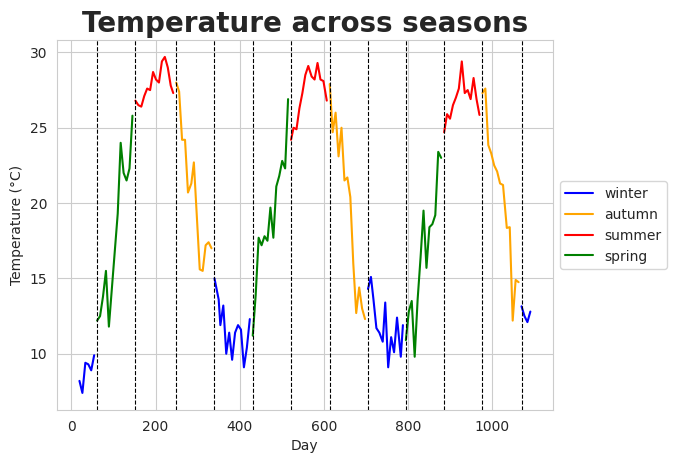

In [37]:
#AI was used to set up the graph in a continuos line with different colors (automatic hue= seasons from seaborn would separate into 4 lines that overlap and looked ugly)
season_colors = {'spring': 'green', 'summer': 'red', 'autumn': 'orange', 'winter': 'blue'}
prev_season = df['seasons'].iloc[0] 
season_change_positions = []
segment_start = 0

for index, row in df.iterrows():
    current_season = row['seasons']
    if current_season != prev_season:
        season_change_positions.append(index)
        plt.plot(df['YearDay'].iloc[segment_start:index], df['Temp'].iloc[segment_start:index], color=season_colors[prev_season], label=prev_season)
        segment_start = index
        prev_season = current_season
plt.plot(df['YearDay'].iloc[segment_start:], df['Temp'].iloc[segment_start:], color=season_colors[prev_season], label=prev_season)
for position in season_change_positions:
    plt.axvline(x=df['YearDay'].iloc[position], color='black', linestyle='--', linewidth=0.8)
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
plt.title('Temperature across seasons',  font = 'Times new roman', weight = 'bold', size= 20)
plt.ylabel('Temperature (°C)')
plt.xlabel('Day')
plt.legend(unique_handles, unique_labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Despite looking very similar, spring and autumn temperatures are significantly different. Still, a seasonal cycle can be confirmed with decent confidence, with clear lows in winter, distinct peaks in summer, and distinct profiles in autumn and spring.

### Chlorophyll
My idea in choosing this variable was that if sunlight and temperature have different seasonal variations, then photosynthetic organims like cyanobacteria would have different concentrations, proportional to the light/heat coming from the sun. 

In [38]:
var = 'Chlorophyll'
data_dict = {'Winter': winter_data[var], 'Summer': summer_data[var], 'Spring': spring_data[var], 'Autumn': autumn_data[var]}
evaluate_f_test(data_dict, var)

F-test evaluation
Null hypothesis that all means are the same, threshold value of 0.05
One-sided f-value from the dataset is 30.8502834, p-value is 0.0000000

p-value smaller than threshold, REJECT null hypothesis
At least one pair with different mean, likely at the alpha = 0.05 significance


In [39]:
labels = np.concatenate([['winter'] * len(winter_data), ['summer'] * len(summer_data),['spring'] * len(spring_data), ['autumn'] * len(autumn_data)])
data = np.concatenate([winter_data[var], summer_data[var], spring_data[var], autumn_data[var]])
perform_tukey_test(data, labels, var)

   group1  group2  meandiff   p-adj   lower   upper  reject
0  autumn  spring   -2.6747  0.0000 -3.7251 -1.6243    True
1  autumn  summer   -0.8313  0.1590 -1.8615  0.1990   False
2  autumn  winter   -3.4347  0.0000 -4.4925 -2.3769    True
3  spring  summer    1.8435  0.0000  0.8061  2.8808    True
4  spring  winter   -0.7600  0.2522 -1.8247  0.3047   False
5  summer  winter   -2.6034  0.0000 -3.6483 -1.5586    True


Likewise this results also indicate a seasonal cycle of two stages: a winter-spring one with lower chlorophyll values, and a summer-autumn one with higher chlorophyll values, as when comparing each of these pair of seasons, the result was not rejecting the null hyposthesis, meaning there´s no significant difference in the means of these pair. This is consistant with seasonal sunlight cycles and the temperature cycle shown above.

### PO4

The literature mentioned above mentioned phosphate cycles, where depleted levels of phosphates indicate bigger bacteria abundances, but it also mentioned that those cycles are hard to notice in the north atlantic due to the impact of added phosphates from rivers. Anyways, I thought it would be interesting to analyze this variable to see whether or not said phosphate cycle is perceptible in the data.

In [40]:
var = 'PO4'
data_dict = {'Winter': winter_data[var], 'Summer': summer_data[var], 'Spring': spring_data[var], 'Autumn': autumn_data[var]}
evaluate_f_test(data_dict, var)

F-test evaluation
Null hypothesis that all means are the same, threshold value of 0.05
One-sided f-value from the dataset is 7.6731705, p-value is 0.0000846

p-value smaller than threshold, REJECT null hypothesis
At least one pair with different mean, likely at the alpha = 0.05 significance


In [41]:
labels = np.concatenate([['winter'] * len(winter_data), ['summer'] * len(summer_data),['spring'] * len(spring_data), ['autumn'] * len(autumn_data)])
data = np.concatenate([winter_data[var], summer_data[var], spring_data[var], autumn_data[var]])
perform_tukey_test(data, labels, var)

   group1  group2  meandiff   p-adj   lower   upper  reject
0  autumn  spring   -0.0373  0.0009 -0.0622 -0.0123    True
1  autumn  summer   -0.0228  0.0783 -0.0473  0.0017   False
2  autumn  winter   -0.0419  0.0002 -0.0671 -0.0168    True
3  spring  summer    0.0145  0.4228 -0.0101  0.0392   False
4  spring  winter   -0.0046  0.9643 -0.0299  0.0207   False
5  summer  winter   -0.0191  0.1916 -0.0440  0.0057   False


Despite what was mentioned earlier, the pattern is still visible, autumn is significantly different than spring and winter,these two latter seasons are not different from each other, and summer hangs out and fits in, not being too different from any of the other seasons.

### Correlations, correlations, correlations!
I generated a correlation matrix of all the variables, both as a general exercise to see which variables have the biggest correlations, and to see which factors have the biggest correlations with bacterial abundance, our main response variable.

In [42]:
#Ai helped me get the correlations between all variables and store them in a correlation matrix.
correlation_matrix = df_numericals.iloc[:, :-1].corr()
biggest_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)
biggest_correlations = biggest_correlations[biggest_correlations != 1]
biggest_correlations = biggest_correlations[biggest_correlations.index.get_level_values(0) < biggest_correlations.index.get_level_values(1)]
df_biggest_correlations = pd.DataFrame(biggest_correlations, columns=['Correlation'])
df_biggest_correlations = df_biggest_correlations.reset_index()
df_biggest_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
print("\nBiggest correlations:")
print(df_biggest_correlations)


Biggest correlations:
            Variable 1         Variable 2  Correlation
0                  DIC           Salinity     0.791320
1                  NH4               SiO4     0.649092
2                  NH4            NO2.NO3     0.647705
3             Salinity                 pH     0.627200
4                 Temp                 pH     0.595216
5              NO2.NO3               SiO4     0.586998
6                  NH4                PO4     0.573983
7          Chlorophyll               Temp     0.551147
8          Chlorophyll               SiO4     0.518574
9                  PO4               SiO4     0.473982
10            Salinity               Temp     0.453072
11  Bacteria_abundance               Temp     0.439309
12                 DIC                 pH     0.430715
13  Bacteria_abundance        Chlorophyll     0.382797
14            Salinity               SiO4     0.375219
15                 DIC               Temp     0.351855
16                 DIC               SiO4 

From this we see some interesting relationships between variables, the strongest correlations were dissolved inorganic carbons with salinity, ammonia with silicates, ammonia with nitrates-nitrites, salinity and pH, and lastly temperature with pH. 

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

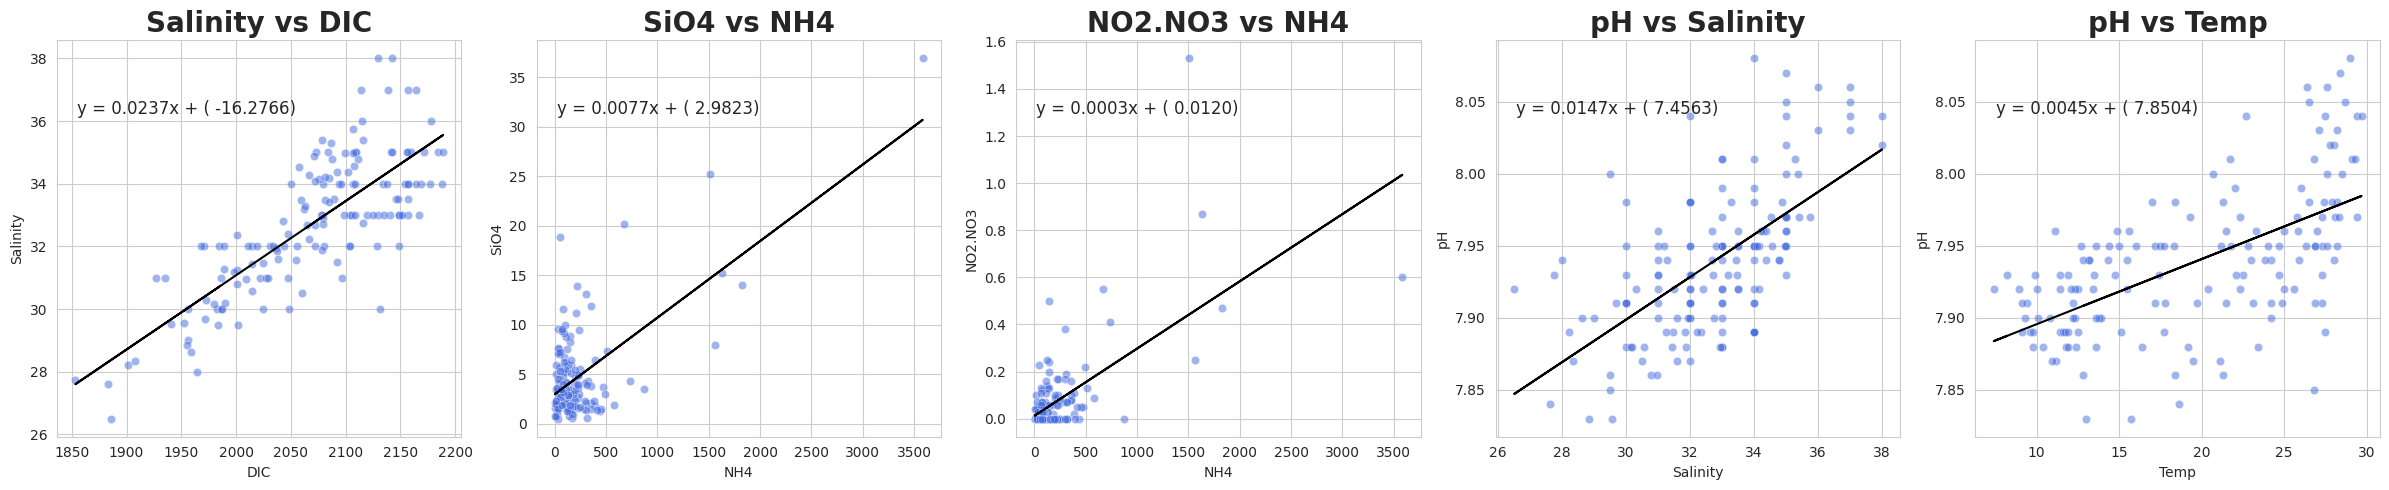

In [43]:
#I plotted a scatterplot for all the correlated variables listed above, fitted a line to them using linear regression and printed the equation for it on the graph.
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(24, 5))
X=['DIC','NH4','NH4','Salinity','Temp']
Y=['Salinity','SiO4','NO2.NO3','pH','pH']
axes = [ax1, ax2, ax3,ax4,ax5]
for x,y, ax in zip(X,Y, axes):
    sns.scatterplot(data=df_numericals, x=x, y=y, ax=ax, alpha=0.5,color='royalblue')
    ax.set_title(str(y) + ' vs ' + str(x) , font='Times New Roman', weight='bold', size=20)
    s, c, _, _, std_err = stats.linregress(df_numericals[x],df_numericals[y] )
    line_of_best_fit = s * df_numericals[x] + c
    ax.plot(df_numericals[x], line_of_best_fit, color='black')
    equation_text = f'y = {s:.4f}x + ( {c:.4f})'
    ax.annotate(equation_text, xy=(0.05, 0.85), xycoords='axes fraction', 
    fontsize=12, ha='left', va='top')
plt.tight_layout()


Of course we have to discuss these results, after all,  *correlation does not equal causation* . Some of these correlations do have enough evidence to call them causations though; the ammonia to nitrates-nitrites was explicitly mentioned before as the cycle of nitrogen in the ocean, because the ammonia fixed by cyanobacteria is then transformed to nitrites/nitrates by other kinds of bacteria. Therefore higher levels of ammonia can provide more food for nitrite-nitrate bacteria to produce these compounds. Another one that makes sense is salinity to pH, because some of the aforementioned compounds are alkaline, and them being in water increases salinity (more things dissolved in the water) as well as pH. Lastly salinity to DIC also makes sense, as dissolved inorganic carbons are mostly acidic compounds  ( H2CO3 and HCO3) , which  would lead to more erosion/weathering of seafloor rocks, and the material of these rocks would result in more salinity in seawater samples. Calabrese *et. al.* also mention the effect of DICs as catalysts for chemical weathering reactions: "more DIC with higher H2CO3, HCO3 ratio is transported to the weathering zone, so that ion activity product decreases and the reaction accelerates."(2017, paragraph 60)

As for the variables that correlate most to bacteria abundance we have temperature, chlorophyll and SiO4:

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


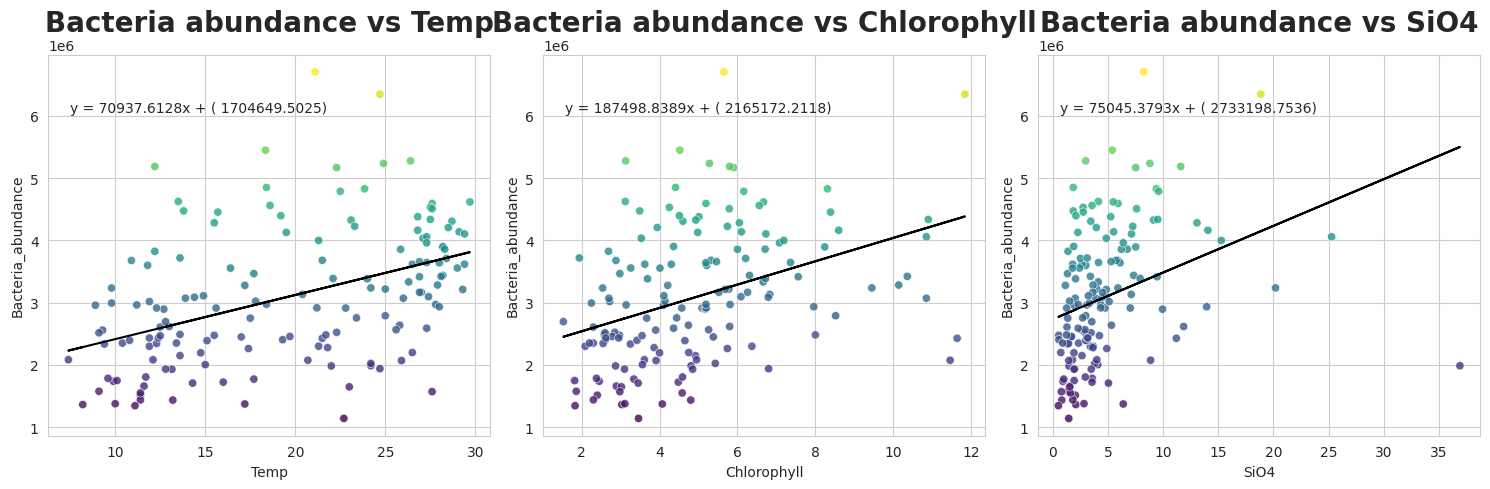

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
features = ['Temp', 'Chlorophyll', 'SiO4']
axes = [ax1, ax2, ax3]
number = df_numericals['Temp'].count()
for feature, ax in zip(features, axes):
    sns.scatterplot(data=df_numericals, x=feature, y='Bacteria_abundance', hue='Bacteria_abundance', palette='viridis', ax=ax, legend= False, alpha=0.8)
    s, c, _, _, std_err = stats.linregress(df_numericals[feature],df_numericals['Bacteria_abundance'] )
    line_of_best_fit = s * df_numericals[feature] + c
    ax.plot(df_numericals[feature], line_of_best_fit, color='black')
    equation_text = f'y = {s:.4f}x + ( {c:.4f})'
    ax.annotate(equation_text, xy=(0.05, 0.85), xycoords='axes fraction')
    ax.set_title('Bacteria abundance vs ' + feature, font='Times New Roman', weight='bold', size=20)
plt.tight_layout()

However, in these regressions, some outlier data points seem to be having too big of an impact on the line of best fit, especially on the graph for the SiO4 variable. So I consulted my good friend google and found RANSAC regression(Random Sample Concensus), an algorythm used to do regressions with data that contains lots of outliers, quoting the original authors of the method " RANSAC is capable of interpreting/smoothing data containing a significant percentage of gross errors". (Fischler & Bolles, 1981, paragraph 1)
<br>The algorythm samples data points, fits a line to them, and labels points as outliers and inliers depending on their distance to the line within a certain tolerance. This process is then repeated and the sample with the most inlier data points is chosen, and those data points become the concensus set, leading to models that ignore outliers and better represent the data. 

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


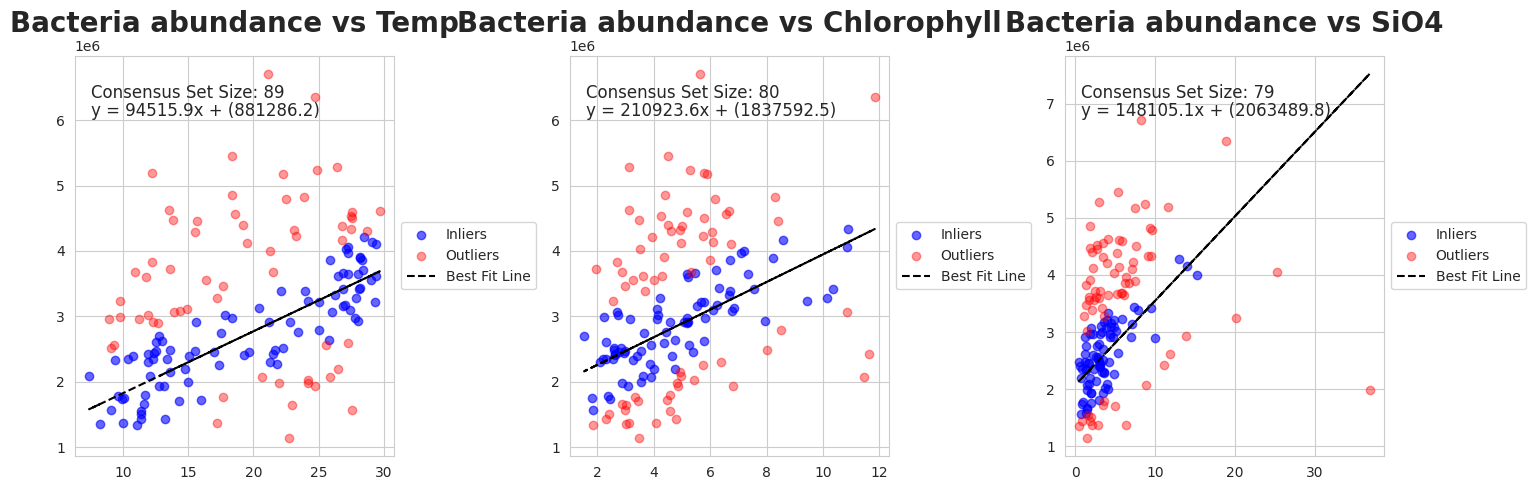

In [45]:
#Ai helped me to plot a scatterplot of the relevant variables and fit a line to them using RANSAC regression, highlighting on the graph the inliers and the outliers, aswell as presenting the size of the concensus set and the equation for the line on the graph.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
features = ['Temp', 'Chlorophyll', 'SiO4']
axes = [ax1, ax2, ax3]
for feature, ax in zip(features, axes):
    ransac = RANSACRegressor()
    X = df_numericals[feature].values.reshape(-1, 1)
    y = df_numericals['Bacteria_abundance'].values.reshape(-1, 1)
    ransac.fit(X, y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    ax.scatter(X[inlier_mask], y[inlier_mask], color='blue', label='Inliers', alpha=0.6)
    ax.scatter(X[outlier_mask], y[outlier_mask], color='red', label='Outliers', alpha = 0.4)
    line_of_best_fit = ransac.predict(X)
    ax.plot(X, line_of_best_fit, color='black', linestyle='--', label='Best Fit Line')
    equation_text = f'y = {ransac.estimator_.coef_[0][0]:.1f}x + ({ransac.estimator_.intercept_[0]:.1f})'
    ax.annotate(equation_text, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12)
    consensus_set_size = np.sum(inlier_mask)
    ax.text(0.05, 0.93, f'Consensus Set Size: {consensus_set_size}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.set_title('Bacteria abundance vs ' + feature, font='Times New Roman', weight='bold', size=20)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

These correlations all do make sense, bacteria do like warmer temperatures, Chlorophyll is a good indicator for the presence of photosynthetic organisms, and silicates , as mentioned before, are the building blocks for the cell walls of diatoms. These last variables are linked to particular kinds of bacteria, so they might be used as indicators towards particular microbiological profiles.

### PCA and other kinds of dark magic
I started by doing a PCA inviting all variables but bacteria abundance, to see wheter there were patterns/ clusters in seasonality or bacterial abundance:

In [46]:
# Perform PCA with scaled variables and print the variance explained by said PCs.
features = ["Temp", "Salinity", "Oxygen_Saturation", "pH", "DIC", "NH4", "NO2.NO3", "PO4", "SiO4",'Chlorophyll']
input_vars = df.loc[:, features].values
input_var_scaled = StandardScaler().fit_transform(input_vars)
pca = PCA(n_components=3)
pca_comp = pca.fit_transform(input_var_scaled)
pca_df = pd.DataFrame(data=pca_comp, columns=['PC1', 'PC2','PC3'])
pca_df["Bacteria_abundance"] = df["Bacteria_abundance"].values
pca_df['season']=df['seasons']
print(pca_df)
print(f"Variance explained by 3 PCs: {100 * round(pca.explained_variance_ratio_.sum(), ndigits=2)} %")

          PC1       PC2       PC3  Bacteria_abundance  season
0   -0.050646 -1.763560 -0.756593         1362561.576  winter
1    0.207604 -1.868894 -0.723483         2083018.868  winter
2   -0.395436 -1.946795 -0.441314         2335241.000  winter
3    0.627143 -2.238788 -0.106150         2559090.909  winter
4   -0.288375 -1.770883 -0.183925         2958974.359  winter
..        ...       ...       ...                 ...     ...
146 -0.097281 -0.781949 -0.368660         2194444.444  autumn
147 -0.428200 -0.821780 -0.033693         1931092.437  winter
148  0.544524 -1.373852 -0.535446         2469902.913  winter
149  0.092680 -1.209465  0.119462         2082000.000  winter
150 -0.060987 -1.016301 -0.657050         1932283.465  winter

[151 rows x 5 columns]
Variance explained by 3 PCs: 71.0 %


It´s not great that the variance explained by 3 PCs is so low, and while PCA is useful, the results of this one have to be taken with a grain of salt, and it can be interpreted that all of the variables in the original dataset are important, and that dimensionality reduction is not a very reliable tool to analyze this dataset.
<br>In spite of this, I plotted the results of the PCA by season:

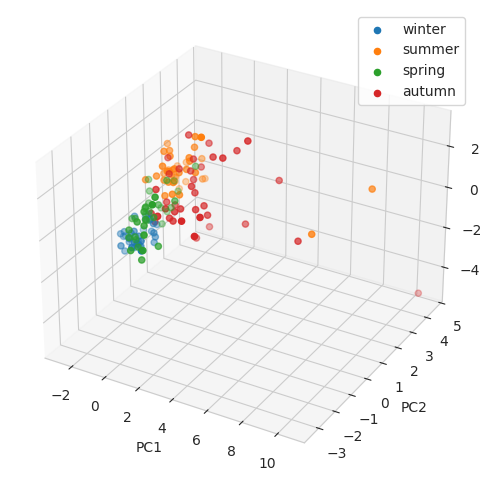

In [47]:
#Visualize the results of the 3 PCs through the lens of seasons.
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
scatter_plots = []
for season in seasons_list:
    data = pca_df.loc[pca_df['season'] == season]
    scatter_plot = ax.scatter(data['PC1'], data['PC2'], data['PC3'], label=season)
    scatter_plots.append(scatter_plot)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()

Clusters are not very clear, it can be argued that there is a winter-spring cluster, as these 2 are well outside the other 2 seasons; the summer points also look somewhat separate, and lastly ,  autumn is all over the place. This could mean that conditions are similar in winter and spring, summer has distinct environmental conditions, and autumn has no distinct pattern. 
<br>
To further analyze the data, I plotted the PCs by bacterial abundance:

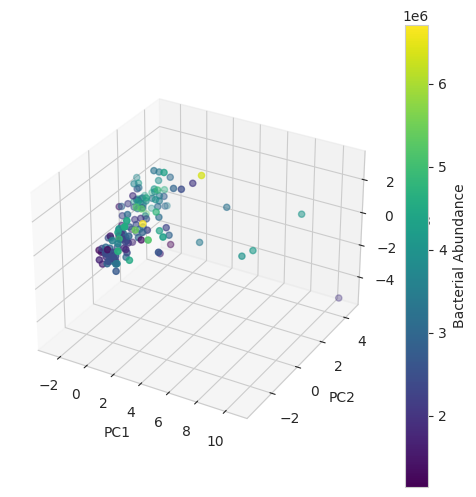

In [48]:
#Visualize the results of the 3 PCs through the lens of bacterial abundance.
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection="3d")
scatter_plot = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Bacteria_abundance'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
cbar = plt.colorbar(scatter_plot)
cbar.set_label('Bacterial Abundance')
plt.show()

Only pattern of note is that the lowest bacterial abundance values all gather up to the left with few exceptions. This mostly matches up with the winter data points in the previous visualization, and could mean that the environmental conditions in winter might cause consistently low bacterial abundances.
<br> To complement this analysis, I brought another dimensionality reduction tecnique, t-SNE. It uses distances between the points to compute "similarity" between them, it does this by putting the points in a t distribution centered on a given point. After getting this "similarity score", it plops all the points randomly on an axis, an moves them according to their similarity, eventually ending with axis where the points that are relatively close together on the original data cluster together, allowing the visualization of patterns and clusters. The main parameter to take into account is perplexity, the parameter that represents the expected density of clusters, according to the original creator of the algorythm: "In t-SNE, the perplexity may be viewed as a knob that sets the number of effective nearest neighbors. " (van der Maaten,2014, paragraph 14)
<br>
Here´s t-SNE:

Text(0.5, 1.0, 't - SNE')

findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.


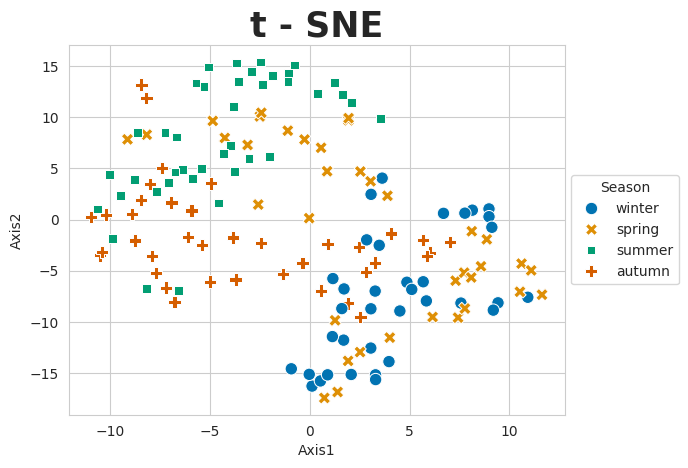

In [49]:
#Performed t-SNE using perplexity = 20, and visualized the results of said test.
tsne = TSNE(n_components = 2, perplexity = 20)
tsne_result = tsne.fit_transform(input_var_scaled)
tsne_df = pd.DataFrame(tsne_result, columns=["Axis1", "Axis2"])
tsne_df['seasons']=df_numericals['seasons']
ax = sns.scatterplot(data=tsne_df,x='Axis1',y='Axis2',hue='seasons',palette='colorblind',style='seasons',s=80)
ax.legend( loc='center left', bbox_to_anchor=(1, 0.5),title='Season')
ax.set_title('t - SNE',font='Times new roman', size= 25, weight= 'bold')

The t-SNE visualization likewise shows a somewhat well defined winter-spring cluster, as well as a mostly homogenous summer cluster, and it can be argued that autumn is also somewhat separate. This, together with the PCA results show that while summer and autumn have unique someqhat independent conditions, winter and spring have more simmilarity between them. The difference between the PCA and the t-SNE visualizations could be attributed to how each analysis operates: PCA uses correlations, t-SNE uses distances, and this could generate a huge difference in this particular dataset. It features wildly fluctuating data and lots of outliers, so perhaps the correlations could have been thrown off by those, while distances could have been have to better pick up patterns in the data.
<br> Last idea I will expose is doing a PCA and t-SNE out of the variables shown earlier to be most strongly correlated to bacteria abundace, in hopes that doing such analysis would shed light on whether those variables have seasonality or not. So I preceded to isolate temperature, silicates and chlorophyll: 

In [50]:
#Performed a PCA using only the variables most correlated to bacterial abundance.
features = ["Temp", "SiO4", "Chlorophyll"]
input_vars = df_numericals.loc[:, features].values
input_var_scaled = StandardScaler().fit_transform(input_vars)
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(input_var_scaled)
pca_df = pd.DataFrame(data=pca_comp, columns=['PC1', 'PC2'])
pca_df["Bacteria_abundance"] = df["Bacteria_abundance"].values
pca_df['season']=df['seasons']
print(pca_df)
print(f"Variance explained by 3 PCs: {100 * round(pca.explained_variance_ratio_.sum(), ndigits=2)} %")

          PC1       PC2  Bacteria_abundance  season
0   -1.783562  0.753180         1362561.576  winter
1   -1.714875  0.779214         2083018.868  winter
2   -1.706535  0.510233         2335241.000  winter
3   -1.377625  0.715610         2559090.909  winter
4   -1.433658  0.641344         2958974.359  winter
..        ...       ...                 ...     ...
146 -0.980838  0.049986         2194444.444  autumn
147 -0.862742  0.204073         1931092.437  winter
148 -1.032648  0.648773         2469902.913  winter
149 -0.685252  0.632985         2082000.000  winter
150 -1.223805  0.507391         1932283.465  winter

[151 rows x 4 columns]
Variance explained by 3 PCs: 88.0 %


This time the PCA of these variables is more trustworthy, and with only 2 PCs!
<br>Anyways, here is the PCs plot:

<Axes: xlabel='PC1', ylabel='PC2'>

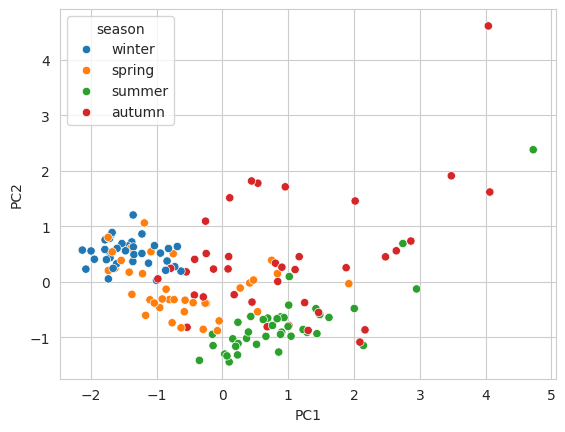

In [51]:
sns.scatterplot(data=pca_df,x='PC1',y='PC2',hue='season')

This time the seasons are somewhat more separate between each other, even winter and spring, which showed a lot of overlap in the previous PCA, show much more separation in this case, summer displays a very tight cluster , and even autumn shows a loose, but somewhat distinct cluster. 

Text(0.5, 1.0, 't - SNE')

findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.
findfont: Font family 'Times new roman' not found.


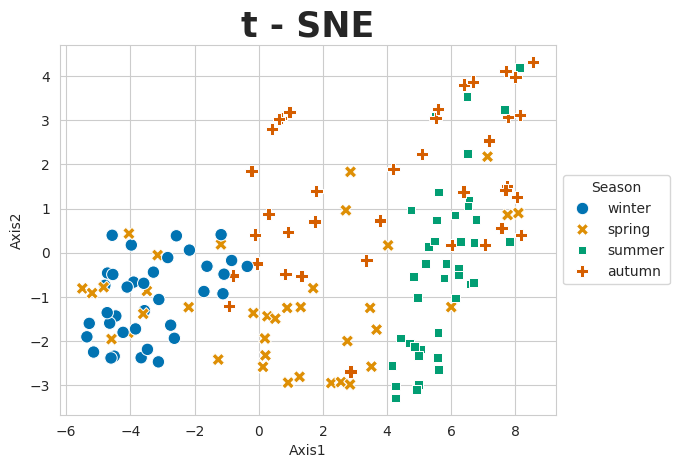

In [52]:
#Performed a t-SNE analysis using only the variables most correlated to bacterial abundance.
tsne = TSNE(n_components = 2, perplexity = 45)
tsne_result = tsne.fit_transform(input_var_scaled)
tsne_df = pd.DataFrame(tsne_result, columns=["Axis1", "Axis2"])
tsne_df['seasons']=df_numericals['seasons']
ax = sns.scatterplot(data=tsne_df,x='Axis1',y='Axis2',hue='seasons',palette='colorblind',style='seasons',s=80)
ax.legend( loc='center left', bbox_to_anchor=(1, 0.5),title='Season')
ax.set_title('t - SNE',font='Times new roman', size= 25, weight= 'bold')

In this case the results were very similar between t-SNE and PCA, indicating that for these 3 variables, correlations do represent distance between the points accurately. Given these results, we can propose that there seasonal cycles in temperature/chlorophyll/SiO4. 

### Conclusions
After using all the tools in the shed, there were quite a lot of findings in the analysis.Through hypothesis testing it was found that there are distinct profiles in bacteria abundance throught the year, temperature cycles do happen, with lows in winter and peaks in summer, Chrophyll was found to have winter-spring and autumn-summer profiles, and lastly, statistical evidence was found supporting PO4 cycles throught the year, consistent with literature found on the topic. A possible link was mentioned between the high bacterial abundance peak in summer and the chlorophyll peaks in that season, indicating that photosynthetic bacteria possibly thrive in that season.  Afterwards correlations were assed, and the relationship between different physichochemical variables was established, and 3 variables were singled out as having the strongest correlation with bacterial abundance: temperature, chlorophyll and silicates. Likewise, this can give us clues about the types of bacteria most prominent in the ocean, silicates linked to diatoms, and chlorophyll linked to photosynthetic bacteria. Lastly, PCA and t-SNE helped discern clusters in the data , showing that winter and spring conditions overlap, summer conditions are more consistent, and autumn conditions are more unstable. When isolationg only the variables most correlated to bacteria abundance, these same analysis showed that there distinct seasonal profiles for that group of variables, possibly suggesting that diferent kinds of bacteria thrive in different seasons of the year.
<br>In conclussion, there are distinct seasonal profiles for several variables, temperature, chlorophyll, and silicates are most correlated to bacteria abundance, and the relationships between these variables could help get a deeper understanding of the microbiological profile of the ocean at different times of the year. However, it must be asserted that these observations are not proof enough to confirm any of these phenomena, and field research is needed to further understand ocean phenomena. 

## References and bibliography

Denny, M. (2008) How the ocean works . Princeton university press. 
<br>Leckie, R. M. & Yuretich, R. (2000) Investigating the ocean. McGraw Hill.
<br>Stowe, K. (1983) Ocean Science. 
<br>Sarmiento, J. L., & Gruber, N. (2006). Silicate Cycle. In Ocean Biogeochemical Dynamics (pp. 270–317). Princeton University Press. https://doi.org/10.2307/j.ctt3fgxqx.11
<br>St‐Jean, G. (2003). Automated quantitative and isotopic (13C) analysis of dissolved inorganic carbon and dissolved organic carbon in continuous‐flow using a total organic carbon analyser. Rapid communications in mass spectrometry, 17(5), 419-428.
<br>Ward, C. S., Yung, C. M., Davis, K. M., Blinebry, S. K., Williams, T. C., Johnson, Z. I., & Hunt, D. E. (2017). Annual community patterns are driven by seasonal switching between closely related marine bacteria. The ISME journal, 11(6), 1412-1422.
<br>Conkright, M. E., Gregg, W. W., & Levitus, S. (2000). Seasonal cycle of phosphate in the open ocean. Deep Sea Research Part I: Oceanographic Research Papers, 47(2), 159-175.
<br>Newcastle university(n.d.)Z-Test. Retrieved from: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/z-test.html
<br>Calabrese, S., Parolari, A. J., & Porporato, A. (2017). Hydrologic transport of dissolved inorganic carbon and its control on chemical weathering. Journal of Geophysical Research: Earth Surface, 122(10), 2016-2032.
<br>Scikit-learn. (n.d.). Robust linear model estimation using RANSAC. Retrieved from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
<br>Fischler, M. A., & Bolles, R. C. (1981). Random sample consensus: a paradigm for model fitting with applications to image analysis and automated cartography. Communications of the ACM, 24(6), 381-395.
<br>van der Maaten, L. (2014) t-SNE. Retrieved from: https://lvdmaaten.github.io/tsne/
<br>Starmer, J. (2017) StatQuest: t-SNE, Clearly Explained. Retrieved from: https://www.youtube.com/watch?v=NEaUSP4YerM